# TASK - 2 : IRIS FLOWER CLASSIFICATION

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Iris.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
label_encoder=LabelEncoder()

In [6]:
na = data.columns[data.isna().any()].tolist() # data-preprocessing
data= data.drop(columns=na)

In [7]:
data['Species']=label_encoder.fit_transform(data['Species']) # label-encoder
X=data.iloc[:,1:5]
y=data['Species']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

In [8]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
X_test.head(30) #predicting test-data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
63,6.1,2.9,4.7,1.4
21,5.1,3.7,1.5,0.4
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
141,6.9,3.1,5.1,2.3
16,5.4,3.9,1.3,0.4
34,4.9,3.1,1.5,0.1
124,6.7,3.3,5.7,2.1
13,4.3,3.0,1.1,0.1
106,4.9,2.5,4.5,1.7


In [10]:
y_pred=knn.predict(X_test)
print('\nPredicted Output\n',label_encoder.inverse_transform(y_pred))


Predicted Output
 ['Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor']


In [11]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.90      0.90      0.90        10
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



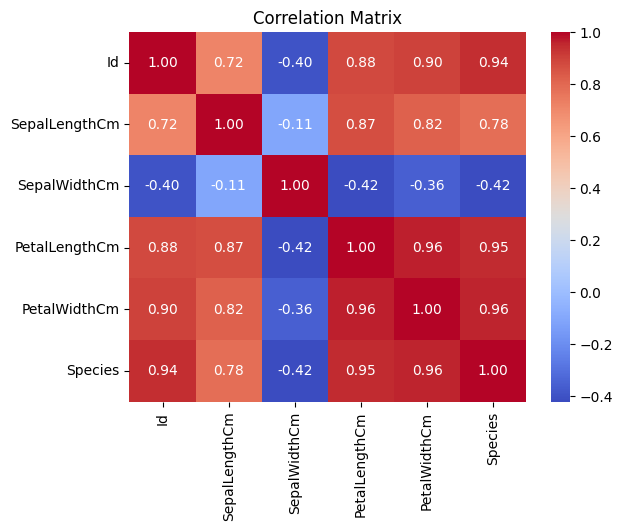

In [12]:
#Correlation Matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

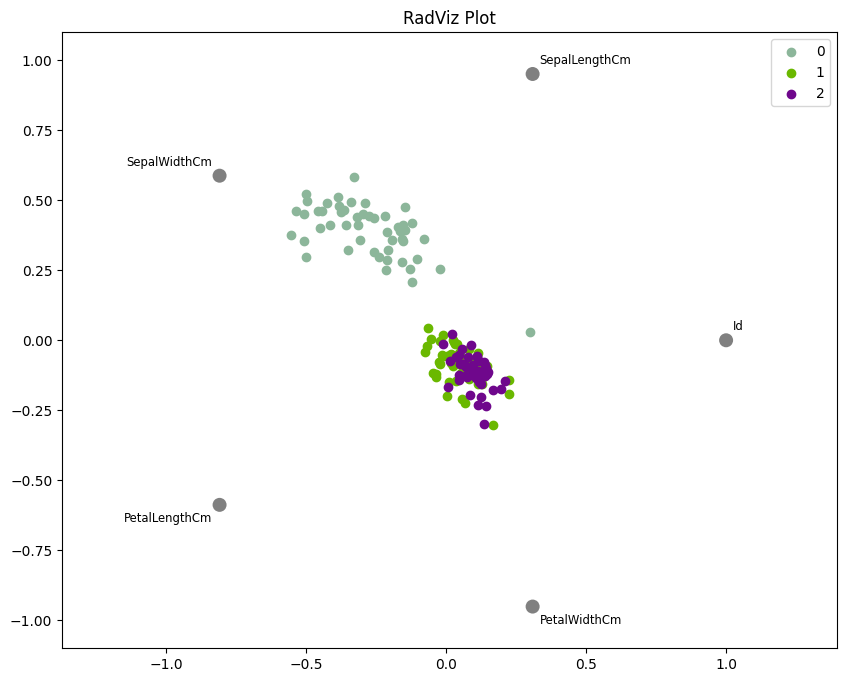

In [13]:
#RadViz Plot
from pandas.plotting import radviz
plt.figure(figsize=(10, 8))
radviz(data, 'Species')
plt.title('RadViz Plot')
plt.show()